---
numbering:
  headings: true
---

# Ecuaciones Diferenciales Ordinarias: Problema de Valor Inicial

## ecuaciones diferenciales ordinarias no lineales

El problema de valor inicial es un conjunto de ecuaciones diferenciales ordinarias en la forma:

$$ \frac{dy}{dx} = f(x, y) \label{ivp}$$

con las condiciones iniciales dada por:

$$ y(x_0) = y_0 $$

Si la función $f$ es no lineal con respecto a $y$, el conjunto de ecuaciones diferenciales ordinarias es no lineal. Para poder ilustrar estos métodos gráficamente, tratamos $y$ como una variable única en lugar de como un vector de variables. Las fórmulas desarrolladas para la solución de una ecuación diferencial única son fácilmente ampliables a aquellas para un conjunto de ecuaciones diferenciales que deben resolverse *simultáneamente*.

El desarrollo de estos métodos primero reorganizando la Ec. [](#ivp) e integrando ambos lados entre los límites de $x_i \le x \le x_{i+1}$ y $y_i \le y \le y_{i+1}$:

$$ \int_{y_i}^{y_{i+1}} dy = \int_{x_i}^{x_{i+1}} f(x,y) dx$$

Al integrar el lado de la izquierda se obtiene:

$$ y_{i+1} - y_i = \int_{x_i}^{x_{i+1}} f(x,y) dx \label{ode-ivp}$$

Un método para integrar la Ec. (5.55) es tomar el lado izquierdo de esta ecuación y usar diferencias finitas para su aproximación. Esta técnica trabaja directamente con las trayectorias tangenciales de la variable dependiente $y$ en lugar de con las áreas bajo la función $f(x,y)$. Esta es la técnica aplicada en [](#euler-section) y [](#rk-section)

(euler-section)=
### Los Métodos de Euler y Euler Modificado

Uno de los métodos más antiguos desarrollados para la solución de ecuaciones diferenciales ordinarias es el método de Euler. Esto se comprende fácilmente al reconocer que el lado izquierdo de la Ec. [](#ode-ivp) es el primer límite finito de $y$ en la posición $i$:

$$ y_{i+1} - y_i = \Delta y $$

que, al reorganizar, nos da una fórmula de *"marcha hacia adelante"* para evaluar $y$:

$$ y_{i+1} = y_i + \Delta y \label{forward-ode}$$

El diferencial adelantado $\Delta y$ aplicada en la posición $i$:
$$ \Delta y = hD_y + \frac{1}{2}h^2 D^2_y + \frac{1}{6}h^3 D^3_y + ...$$

En el método de Euler, la serie anterior se trunca después del primer término para obtener:

$$ \Delta y = hD_y + O(h^2) \label{trunc-euler}$$

La combinación de las Ecs. [](#forward-ode) y [](#trunc-euler) da la *fórmula Euler explícita* para integrar ecuaciones diferenciales:

$$ y_{i+1} = y_i + hD_y + O(h^2) $$

La derivada $Dy_i$se reemplaza por su equivalente $y'_i$ o $f(x,y)$ para dar la forma comúnmente usada del método de Euler explícito:

$$ y_{i+1} = y_i + hf(x_i, y_i) + O(h^2) $$

Esta ecuación simplemente establece que el siguiente valor de $y$ se obtiene del valor actual moviendo un paso de $h$ en la dirección tangencial de $y$, y que esta dirección es calculada basándose en la corriente, el valor conocido de la variable dependiente. La fórmula es bastante inexacta porque tiene un error de truncamiento de solo $O(h^2)$. Si $h$ es grande, la trayectoria de $y$ puede desviarse rápidamente de su valor verdadero.

#### Algoritmo para el Método de Euler

**Entradas:**
1. Ecuación diferencial expresada como $ f(x, y) $
2. Condición inicial: $ y_0 $
3. Valor inicial de la variable independiente: $ x_0 $
4. Tamaño del paso: $ h $
5. Valor final de la variable independiente: $ x_n $

**Salida:**
- Valores aproximados de $ y $ en puntos discretos de $ x $

**Procedimiento:**

1. **Inicializar:**
   - Establecer $ y_{i} = y_0 $ y $ x_{i} = x_0 $.

2. **Iterar:**
   - Para $ i = 0 $ hasta $ n-1 $ (donde $ n $ es el número de pasos calculado como $ n = \frac{x_n - x_0}{h} $):
     - Calcular la pendiente en el punto inicial: $ pendiente = f(x_i, y_i) $
     - Calcular el siguiente valor de $ y $: $ y_{i+1} = y_i + h \cdot pendiente $
     - Actualizar el valor de $ x $: $ x_{i+1} = x_i + h $

3. **Salida:**
   - El algoritmo proporciona la secuencia $ (x_0, y_0), (x_1, y_1), ..., (x_n, y_n) $ como la solución aproximada de la ecuación diferencial sobre el intervalo $ [x_0, x_n] $.

4. **Fin**

#### Implementacion en Python

In [1]:
def euler_method(f, x0, y0, h, n):
    # Create lists to store x and y values
    x = [x0]
    y = [y0]
    
    # Euler algorithm
    for i in range(n):
        y.append(y[i] + h * f(x[i], y[i]))
        x.append(x[i] + h)
    
    return x, y

**Ejemplo:**
\
Si $ f(x, y) = xy $, $ y_0 = 1 $, $ x_0 = 0 $, $ h = 0.1 $, y $ x_n = 1 $, el método de Euler daría una solución aproximada de la ecuación diferencial $ \frac{dy}{dx} = xy $ desde $ x = 0 $ hasta $ x = 1 $ con un tamaño de paso de $ 0.1 $.

In [2]:
def f(x, y):
    return x * y  # Given example equation dy/dx = xy

# Initialize variables
x0 = 0      # Initial x value
y0 = 1      # Initial y value
h = 0.1     # Step size
xn = 1      # Final x value

# Number of steps
n = int((xn - x0) / h)

# Run the Euler method
x_values, y_values = euler_method(f, x0, y0, h, n)

# Print the results
for i in range(n + 1):
    print(f"x_{i} = {x_values[i]:.2f}, y_{i} = {y_values[i]:.2f}")

x_0 = 0.00, y_0 = 1.00
x_1 = 0.10, y_1 = 1.00
x_2 = 0.20, y_2 = 1.01
x_3 = 0.30, y_3 = 1.03
x_4 = 0.40, y_4 = 1.06
x_5 = 0.50, y_5 = 1.10
x_6 = 0.60, y_6 = 1.16
x_7 = 0.70, y_7 = 1.23
x_8 = 0.80, y_8 = 1.31
x_9 = 0.90, y_9 = 1.42
x_10 = 1.00, y_10 = 1.55


La solución exacta a la ecuación diferencial $\frac{dy}{dx} = xy$ dada la condicón incial $y(0) = 1$ es $y = e^{x^2 / 2}$

In [3]:
import numpy as np

def exact_solution(x):
    return np.exp(x**2 / 2)

# Calculate the exact values at the x_values found previously
exact_y_values = [exact_solution(x) for x in x_values]

# Display the exact values alongside the Euler approximations
for i in range(n + 1):
    error = abs(exact_y_values[i] - y_values[i])
    print(f"x_{i} = {x_values[i]:.2f}, y_exact = {exact_y_values[i]:.2f}, y_euler = {y_values[i]:.2f}, error = {error:.2f}")

x_0 = 0.00, y_exact = 1.00, y_euler = 1.00, error = 0.00
x_1 = 0.10, y_exact = 1.01, y_euler = 1.00, error = 0.01
x_2 = 0.20, y_exact = 1.02, y_euler = 1.01, error = 0.01
x_3 = 0.30, y_exact = 1.05, y_euler = 1.03, error = 0.02
x_4 = 0.40, y_exact = 1.08, y_euler = 1.06, error = 0.02
x_5 = 0.50, y_exact = 1.13, y_euler = 1.10, error = 0.03
x_6 = 0.60, y_exact = 1.20, y_euler = 1.16, error = 0.04
x_7 = 0.70, y_exact = 1.28, y_euler = 1.23, error = 0.05
x_8 = 0.80, y_exact = 1.38, y_euler = 1.31, error = 0.06
x_9 = 0.90, y_exact = 1.50, y_euler = 1.42, error = 0.08
x_10 = 1.00, y_exact = 1.65, y_euler = 1.55, error = 0.10


#### Euler Modificado

La precisión del método de Euler puede mejorar mediante el uso de una combinación de diferencias hacia adelante y hacia atrás. Note que el primer límite finito hacia adelante de 
$y$ es igual al primer límite finito hacia atrás de $y$ en $i+1$:

$$ \Delta y_{i} = y_{i} - y_{i-1} = -\nabla y_{i+1} $$

Por lo tanto, la fórmula de marcha hacia adelante en términos de diferencias hacia atrás es:

$$ y_{i+1} = y_i + \nabla y_{i+1} \label{backward-ode}$$

La diferencia hacia atrás $\nabla y_{i+1}$ aplicada en la posición $i+1$:

$$ \nabla y_{i+1} = hD_{y_{i+1}} - \frac{1}{2}h^2 D^2_{y_{i+1}} + \frac{1}{6}h^3 D^3_{y_{i+1}} - ... \label{backward-euler}$$

Combinando las Ecs. [](#backward-ode) y [](#backward-euler):

$$ y_{i+1} = y_i + hD_{y_{i+1}} + O(h^2) \label{euler-imp}$$

Esto se llama la fórmula de Euler implícita (o Euler hacia atrás) porque involucra el cálculo de la función $f$ en un valor desconocido de $y_{i+1}$ La Ec. [](#euler-imp) puede verse como dar un paso adelante desde la posición $i$ a $i+1$ en una dirección de gradiente que debe evaluarse en $i+1$.

En el caso de los métodos de Euler, el problema se puede simplificar primero aplicando el método explícito para *predecir* un valor $y_{i+1}$:

$$ (y_{i+1})_{Pr} = y_i + hf(x_i, y_i) + O(h^2) \label{euler-predict}$$

y luego utilizando este valor predicho en el método implícito para obtener un valor *corregido*:

$$ ({y}_{i+1})_{Cor} = y_i + hf(x_{i+1}, \bar{y}_{i+1}) + O(h^2) \label{euler-corr}$$

Esta combinación de pasos es conocida como el *método de Euler predictor-corrector* (o *modificado Euler*). La corrección por Eq. [](#euler-corr) se aplica más de una vez hasta que el valor corregido converge; es decir, la diferencia entre las dos sucesivas correcciones obtenidas se vuelve menor que el error de convergencia. Sin embargo, no mucho más que dos veces se necesita hacer para lograr una convergencia satisfactoria.

El explícito, así como el implícito, las formas del método de Euler tienen un error de orden $O(h^2)$. Sin embargo, cuando se utilizan en combinación el uno con el otro, como predictor-corrector, su precisión se mejora, dando un error de orden $O(h^3)$. Esta conclusión se puede alcanzar sumando las Ecs. [](#forward-ode) y [](#backward-ode):

$$ y_{i+1} = y_i + \frac{1}{2}(\Delta y_i + \nabla y_{i+1}) $$

y usando las Eqs. [](#forward-ode) y [](#backward-euler) para obtener:

$$ y_{i+1} = y_i + \frac{h}{2}[f(x_i, y_i) + f(x_{i+1}, \bar{y}_{i+1})] + O(h^3) \label{euler-mod}$$

Los términos del orden $O(h^2)$ se cancelan porque tienen signos opuestos, dando así una fórmula de mayor precisión.

#### Algoritmo para el Método de Euler Modificado (Método Predictor-Corrector)

**Entradas:**
1. Ecuación diferencial expresada como $f(x, y)$
2. Condición inicial: $y_0$
3. Valor inicial de la variable independiente: $x_0$
4. Tamaño del paso: $h$
5. Valor final de la variable independiente: $x_n$

**Salida:**
- Valores aproximados de $y$ en puntos discretos de $x$

**Procedimiento:**

1. **Inicializar:**
   - Establecer $y_{i} = y_0$ y $x_{i} = x_0$.

2. **Iterar:**
   - Para $i = 0$ hasta $n-1$ (donde $n$ es el número de pasos calculado como $n = \frac{x_n - x_0}{h}$):
     - Calcular la pendiente predictor en el punto inicial: $f_i = f(x_i, y_i)$
     - Hacer una predicción para el siguiente valor de $y$: $y^*_{i+1} = y_i + h \cdot f_i$
     - Calcular la pendiente corrector en el punto predicho siguiente: $f^*_{i+1} = f(x_{i+1}, y^*_{i+1})$
     - Calcular el siguiente valor corregido de $y$: $y_{i+1} = y_i + \frac{h}{2} \cdot (f_i + f^*_{i+1})$
     - Actualizar el valor de $x$: $x_{i+1} = x_i + h$

3. **Salida:**
   - El algoritmo proporciona la secuencia $(x_0, y_0), (x_1, y_1), ..., (x_n, y_n)$ como la solución aproximada de la ecuación diferencial sobre el intervalo $[x_0, x_n]$.

4. **Fin**

Para el ejemplo anterior:



In [4]:
def modified_euler_method(f, x0, y0, h, n):
    x_values = [x0]
    y_values = [y0]
    
    for i in range(n):
        # Predictor step
        y_predict = y_values[-1] + h * f(x_values[-1], y_values[-1])
        
        # Corrector step
        x_next = x_values[-1] + h
        y_correct = y_values[-1] + (h / 2) * (f(x_values[-1], y_values[-1]) + f(x_next, y_predict))
        
        # Append the next values of x and y
        x_values.append(x_next)
        y_values.append(y_correct)
    
    return x_values, y_values

In [5]:
# Running the Modified Euler Method for the given example
x_values_me, y_values_me = modified_euler_method(f, x0, y0, h, n)

# Calculate the exact values for comparison
exact_y_values_me = [exact_solution(x) for x in x_values_me]

# Display the results with comparison to the exact solution
for i in range(n + 1):
    error_me = abs(exact_y_values_me[i] - y_values_me[i])
    print(f"x_{i} = {x_values_me[i]:.2f}, y_exact = {exact_y_values_me[i]:.2f}, y_modified_euler = {y_values_me[i]:.2f}, error = {error_me:.2f}")

x_0 = 0.00, y_exact = 1.00, y_modified_euler = 1.00, error = 0.00
x_1 = 0.10, y_exact = 1.01, y_modified_euler = 1.00, error = 0.00
x_2 = 0.20, y_exact = 1.02, y_modified_euler = 1.02, error = 0.00
x_3 = 0.30, y_exact = 1.05, y_modified_euler = 1.05, error = 0.00
x_4 = 0.40, y_exact = 1.08, y_modified_euler = 1.08, error = 0.00
x_5 = 0.50, y_exact = 1.13, y_modified_euler = 1.13, error = 0.00
x_6 = 0.60, y_exact = 1.20, y_modified_euler = 1.20, error = 0.00
x_7 = 0.70, y_exact = 1.28, y_modified_euler = 1.28, error = 0.00
x_8 = 0.80, y_exact = 1.38, y_modified_euler = 1.38, error = 0.00
x_9 = 0.90, y_exact = 1.50, y_modified_euler = 1.50, error = 0.00
x_10 = 1.00, y_exact = 1.65, y_modified_euler = 1.65, error = 0.00


#### Crank-Nicholson

Se puede ver escribiendo la Ec. [](#euler-mod) en la forma:

$$ y_{i+1} = y_i + \frac{1}{2}h[f(x_i, y_i) + f(x_{i+1}, y_{i+1})] + O(h^2) \label{crank-nicolson}$$

que este método de Euler utiliza las trayectorias ponderadas de la función $y$ evaluadas en dos posiciones que están separadas por un paso completo de ancho $h$ y ponderadas equitativamente. En esta forma, la Ec. [](#crank-nicolson) también es conocida como el método de Crank-Nicolson y se puede expresar en su forma general:

$$ y_{i+1} = y_i + w_1k_1 + w_2k_2 $$

donde:
$$ k_1 = hf(x_i, y_i) $$

$$ k_2 = hf(x_i + c_2h, y_i + a_{21}k_1) $$

La elección de los factores de ponderación $w_1$ y $w_2$, y las posiciones $i$ y $i+1$ en las cuales evaluar las trayectorias es dictada por la precisión requerida de la fórmula de integración, es decir, por el número de términos retenidos en la serie de expansión infinita.

#### Algoritmo para el Método de Crank-Nicolson

**Entradas:**
1. Ecuación diferencial expresada como $f(x, y)$
2. Condición inicial: $y_0$
3. Valor inicial de la variable independiente: $x_0$
4. Tamaño del paso: $h$
5. Valor final de la variable independiente: $x_n$

**Salida:**
- Valores aproximados de $y$ en puntos discretos de $x$

**Procedimiento:**

1. **Inicializar:**
   - Establecer $y_{i} = y_0$ y $x_{i} = x_0$.

2. **Iterar:**
   - Para $i = 0$ hasta $n-1$ (donde $n$ es el número de pasos calculado como $n = \frac{x_n - x_0}{h}$):
     - Calcular $x_{i+1} = x_i + h$.
     - Resolver la ecuación implícita para $y_{i+1}$:
       $$
       y_{i+1} = y_i + \frac{h}{2} \left(f(x_i, y_i) + f(x_{i+1}, y_{i+1})\right)
       $$
       Esta ecuación debe resolverse para $y_{i+1}$, lo que generalmente requiere un método iterativo como Newton-Raphson debido a la dependencia de $y_{i+1}$ en ambos lados de la ecuación.

3. **Salida:**
   - El algoritmo proporciona la secuencia $(x_0, y_0), (x_1, y_1), ..., (x_n, y_n)$ como la solución aproximada de la ecuación diferencial sobre el intervalo $[x_0, x_n]$.

4. **Fin**

Para el ejemplo anterior:

In [6]:
from scipy.optimize import fsolve

def crank_nicolson(f, x0, y0, h, n):
    x_values = [x0]
    y_values = [y0]

    for i in range(n):
        x_next = x_values[-1] + h

        # Define the function for the implicit equation to be solved at y_next
        def equation(y_next):
            return y_values[-1] + (h / 2) * (f(x_values[-1], y_values[-1]) + f(x_next, y_next)) - y_next

        # Use fsolve to solve the implicit equation
        y_next = fsolve(equation, y_values[-1])

        # Append the next values of x and y
        x_values.append(x_next)
        y_values.append(y_next[0])

    return x_values, y_values

In [7]:
# Running the Crank-Nicolson Method for the given example
x_values_cn, y_values_cn = crank_nicolson(f, x0, y0, h, n)

# Calculate the exact values for comparison
exact_y_values_cn = [exact_solution(x) for x in x_values_cn]

# Display the results with comparison to the exact solution
for i in range(n + 1):
    error_cn = abs(exact_y_values_cn[i] - y_values_cn[i])
    print(f"x_{i} = {x_values_cn[i]:.2f}, y_exact = {exact_y_values_cn[i]:.2f}, y_crank_nicolson = {y_values_cn[i]:.2f}, error = {error_cn:.2f}")



x_0 = 0.00, y_exact = 1.00, y_crank_nicolson = 1.00, error = 0.00
x_1 = 0.10, y_exact = 1.01, y_crank_nicolson = 1.01, error = 0.00
x_2 = 0.20, y_exact = 1.02, y_crank_nicolson = 1.02, error = 0.00
x_3 = 0.30, y_exact = 1.05, y_crank_nicolson = 1.05, error = 0.00
x_4 = 0.40, y_exact = 1.08, y_crank_nicolson = 1.08, error = 0.00
x_5 = 0.50, y_exact = 1.13, y_crank_nicolson = 1.13, error = 0.00
x_6 = 0.60, y_exact = 1.20, y_crank_nicolson = 1.20, error = 0.00
x_7 = 0.70, y_exact = 1.28, y_crank_nicolson = 1.28, error = 0.00
x_8 = 0.80, y_exact = 1.38, y_crank_nicolson = 1.38, error = 0.00
x_9 = 0.90, y_exact = 1.50, y_crank_nicolson = 1.50, error = 0.00
x_10 = 1.00, y_exact = 1.65, y_crank_nicolson = 1.65, error = 0.00


#### Tarea

En un reactor tipo batch, se lleva a cabo una reacción química con una velocidad de reacción:

$$ -r_A = -\frac{dC_A}{dt} = \frac{k_1 C_A}{1 + k_2 C_A}$$

Considere valores de constantes $k_1 = 1.5$ y $k_2 = 0.1$, y la concentración inicial de $A$ en el reactor es 1. Utilice el método de Euler, Euler modificado y el método de Crank-Nicholson para resolver el problem y realizar la comparación entre ellos. 

(rk-section)=
### Runge-Kutta

Los métodos de integración más utilizados para ecuaciones diferenciales ordinarias son la serie de métodos llamados Runge-Kutta de segundo, tercer y cuarto orden, además de una serie de otras técnicas que son variaciones del tema Runge-Kutta. Estos métodos se basan en el concepto de trayectorias ponderadas. De una manera más general, la fórmula de integración de marcha hacia adelante para la ecuación diferencial se da por la ecuación recurrente:

$$ y_{i+1} = y_i + w_1 k_1 + w_2 k_2 + \dots + w_m k_m $$

Las trayectorias $k_i$ son evaluadas:
$$
\begin{aligned}
k_1 &= hf(x_i, y_i) \\
k_2 &= hf(x_i + c_2 h, y_i + a_{21} k_1) \\
k_3 &= hf(x_i + c_3 h, y_i + a_{31} k_1 + a_{32} k_2)\\
&\vdots \\
k_m &= hf(x_i + c_m h, y_i + a_{m1} k_1 + a_{m2} k_2 + \dots + a_{mm-1} k_{mm-1})
\end{aligned}
$$

Estas ecuaciones pueden escribirse en una forma compacta como:

$$ y_{n+1} = y_n + \sum_{i=1}^{s} w_i k_i \label{ycomp}$$

donde

$$ k_i = hf \left( x_n + c_j h, y_i + \sum_{l=1}^{j-1} a_{jl}k_l \right) $$

donde $ c_1 = 0 $ y $ a_{1j} = 0 $. El valor de $m$, que determina la complejidad y exactitud del método, se elige cuando $m + 1$ términos se retienen en la serie infinita $y_{i+1}$:

$$ y_{i+1} = y_i + h y_i' + \frac{h^2 y_i''}{2!} + \frac{h^3 y_i'''}{3!} + ...  $$

o

$$ y_{i+1} = y_i + h Dy_i + \frac{h^2 D^2y_i}{2!} + \frac{h^3 D^3y_i}{3!} + ...  \label{rk-series}$$

El procedimiento para derivar los métodos de Runge-Kutta se puede dividir en cinco pasos que se demuestran en el texto que sigue con la derivación de las fórmulas de *Runge-Kutta de segundo orden*.

Paso 1: Elija el valor de $m$, lo que fija la cantidad de la fórmula a obtener. Para métodos de Runge-Kutta de segundo orden, $m = 2$. Trunca la serie [](#rk-series) después del término $(m + 1)$:

$$ y_{i+1} = y_n + hDy_i + \frac{h^2D^2 y_i}{2!} + O(h^3) \label{step1}$$

Paso 2: Reemplace cada derivada de $y$ en [](#step1) con $D y^{(i)}$ recordando que $f$ es una función de ambas $x$ y $y(x)$:

$$ Dy = f $$

$$
\begin{aligned}
D^2 y_i &= \frac{df}{dx} = \left( \frac{\partial f}{\partial x}\frac{dx}{dy} + \frac{\partial f}{\partial y} \frac{dy}{dx} \right) \\
&= (f_x + ff_y)_i
\end{aligned}
$$

Combine las ecuaciones anteriores y juntar los términos:

$$ y_{i+1} = y_i + h f_i + \frac{h^2}{2} f_{x_i} + \frac{h^2}{2}f_i f_{y_i} + O(h^3) \label{step2}$$

Paso 3: Escriba Ec. [](#ycomp) con los términos en la sumatoria:

$$ y_{i+1} = y_i + w_1 k_1 + w_2 k_2 $$

donde

$$ k_1 = hf(x_i, y_i) $$

$$ k_2 = hf(x_i + c_2 h, y_i + a_{21}k_1) $$

Paso 4: Expandie la función $f$ en la serie de Taylor y mantenga los términos de primer orden:

$$ f(x_i + c_2h, y_i + a_{21}k_1) = f_i + c_2hf_{x_i} + a_{21}h f_{y_i} f_i + O(h^2) $$

Al combinar las ecuaciones y agrupar los términos:

$$ y_{i+1} = y_i + (w_1 + w_2)hf_i + \left(w_2c_2 \right)h^2f_{x_i} + \left(w_2 a_{21}\right)h^2f_i f_{y_i} + O(h^3) \label{step4}$$

Paso 5: Para las Ecs. [](#step2) y [](#step4) ser idénticas, los coeficientes de los términos correspondientes deben ser iguales entre sí. Esto resulta en un conjunto de ecuaciones algebraicas no lineales simultáneas en las constantes desconocidas $w$, $c$ y $a$. Para este método Runge-Kutta de segundo orden, hay tres ecuaciones y cuatro incógnitas:

$$
\begin{aligned}
w_1 + w_2 &= 1 \\
w_2c_2 &= \frac{1}{2} \\
w_2a_{21} &= \frac{1}{2}
\end{aligned}
$$

Resulta que siempre hay más variables que ecuaciones. El grado de libertad nos permite elegir algunos de los parámetros. Para Runge-Kutta de segundo orden, hay un grado de libertad. Para métodos de tercer y cuarto orden, hay tres y cuatro grados de libertad respectivamente. Para Runge-Kutta de quinto orden, hay al menos cinco grados de libertad. Esta libertad de elección de parámetros da lugar a una gran cantidad de diferentes formas de los métodos Runge-Kutta. Es generalmente deseable elegir primero los valores de las constantes $c$, fijando así las posiciones a lo largo de la variable independiente, donde las funciones:

$$ f \left( x_i + c_jh, y_i \sum_{l+1}^{j-1} a_{jl}k_l \right) $$

deben ser evaluadas. Una consideración importante al elegir los parámetros libres es minimizar el redondeo del error en el cálculo. La discusión del efecto del error por redondeo se dará en la Sección 5.8.

Para el método Runge-Kutta de segundo orden que actualmente derivamos, dejemos que $c_2 = 1$. El resto de los parámetros se evalúan como:

$$ w_1 = w_2 = \frac{1}{2} $$

$$ a_{21} = 1 $$

Con este conjunto de parámetros, la fórmula de Runge-Kutta de segundo orden es:

$$ 
\begin{aligned}
y_{i+1} &= y_i + \frac{1}{2} (k_1 + k_2) + O(h^3) \\
k_1 &= hf(x_i, y_i) \\
k_2 &= hf(x_i + h, y_i + k_1)
\end{aligned}
$$

Este método es esencialmente idéntico al método de Crank-Nicolson (ver Ec. [](#crank-nicolson)). Una versión diferente del método de Runge-Kutta de segundo orden se obtiene al elegir evaluar la función en los puntos medios (i.e., $c_2 = 1/2 $). Esto produce la fórmula:

$$ 
\begin{aligned}
y_{i+1} &= y_i + k_2 + O(h^3)\\
k_1 &= hf(x_i, y_i) \\
k_2 &= hf \left( x_i + \frac{1}{2} h, y_i + \frac{1}{2} k_1 \right)
\end{aligned}
$$

Las fórmulas de Runge-Kutta de orden superior se derivan de una manera análoga. El método de Runge-Kutta de cuarto orden, que tiene un error de $O(h^5)$, es probablemente el método de integración numérica más utilizado para ecuaciones diferenciales ordinarias. La razón de la popularidad de usar esta fórmula es el buen equilibrio entre la cantidad de evaluaciones de la función y la precisión de la fórmula, pero no hay convergencias iterativas como con el Euler implícito.

#### Algoritmo para el Método de Runge-Kutta de 4to Orden

**Entradas:**
1. Ecuación diferencial expresada como $f(x, y)$.
2. Condición inicial: $y_0$.
3. Valor inicial de la variable independiente: $x_0$.
4. Tamaño del paso: $h$.
5. Valor final de la variable independiente: $x_n$.

**Salida:**
- Valores aproximados de $y$ en puntos discretos de $x$.

**Procedimiento:**

1. **Inicializar:**
   - Establecer $y_i = y_0$ y $x_i = x_0$.

2. **Iterar:**
   - Para $i = 0$ hasta $n-1$ (donde $n$ es el número de pasos calculado como $n = \frac{x_n - x_0}{h}$):
     - Calcular las pendientes intermedias:
       $$
       k_1 = hf(x_i, y_i)
       $$
       $$
       k_2 = hf\left(x_i + \frac{h}{2}, y_i + \frac{k_1}{2}\right)
       $$
       $$
       k_3 = hf\left(x_i + \frac{h}{2}, y_i + \frac{k_2}{2}\right)
       $$
       $$
       k_4 = hf(x_i + h, y_i + k_3)
       $$
     - Calcular el siguiente valor de $y$:
       $$
       y_{i+1} = y_i + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)
       $$
     - Actualizar el valor de $x$:
       $$
       x_{i+1} = x_i + h
       $$

3. **Salida:**
   - El algoritmo proporciona la secuencia $(x_0, y_0), (x_1, y_1), ..., (x_n, y_n)$ como la solución aproximada de la ecuación diferencial sobre el intervalo $[x_0, x_n]$.

4. **Fin**

#### Implementación en Python


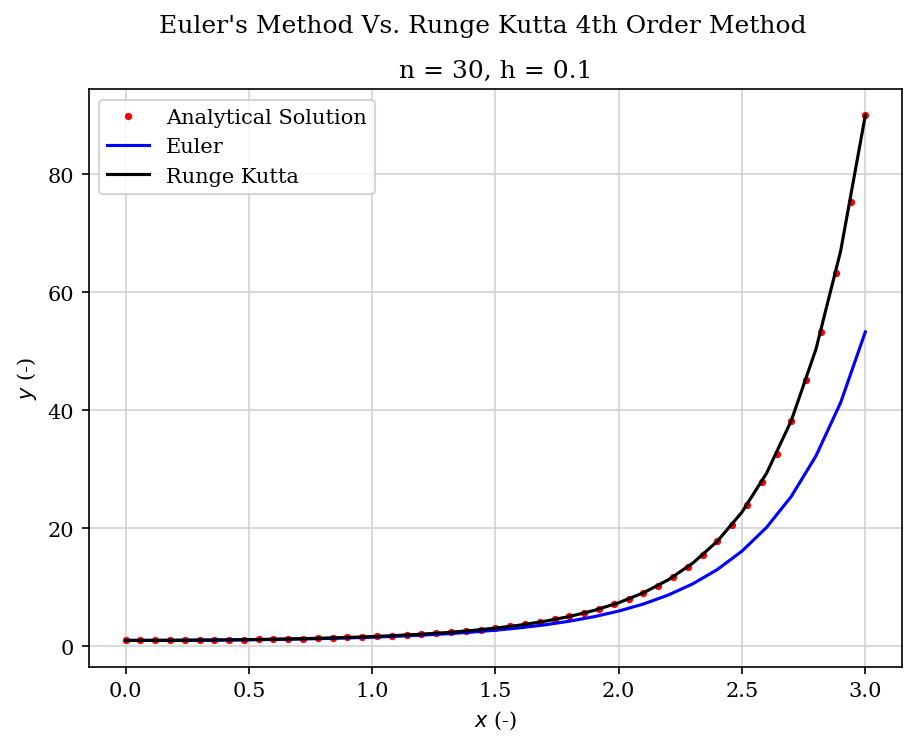

In [8]:
# The 4th-order Runge-Kutta method
def runge_kutta_4(f, x0, y0, h, n):
    x_values = [x0]
    y_values = [y0]
    
    # Iterate over each step
    for i in range(n):
        # Calculate intermediate slopes
        k1 = h * f(x_values[i], y_values[i])
        k2 = h * f(x_values[i] + h/2, y_values[i] + k1/2)
        k3 = h * f(x_values[i] + h/2, y_values[i] + k2/2)
        k4 = h * f(x_values[i] + h, y_values[i] + k3)
        
        # Compute the next value of y
        y_next = y_values[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
        x_next = x_values[i] + h
        
        # Append the next values of x and y
        x_values.append(x_next)
        y_values.append(y_next)
    
    return x_values, y_values

# starting conditions
x0 = 0      # Initial x value
y0 = 1      # Initial y value
h = 0.1     # Step size
xn = 3      # Final x value

# Number of steps
n = int((xn - x0) / h)

# solutions
x_euler, y_euler = euler_method(f, x0, y0, h, n)
x_rk4, y_rk4 = runge_kutta_4(f, x0, y0, h, n)
x_ana = np.linspace(0,3,51)
y_ana = exact_solution(x_ana)

# plot
import matplotlib.pyplot as plt
plt.figure(num=1, dpi=150, figsize=(7, 5))
plt.rcParams["font.family"] = "serif"
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.facecolor']='white'

plt.plot(x_ana,y_ana,'ro',label = "Analytical Solution",markersize=2.5)
plt.plot(x_euler, y_euler,'b-', label = "Euler")
plt.plot(x_rk4, y_rk4,'k-', label = "Runge Kutta")

plt.legend()
plt.grid(True, color='lightgray')
plt.xlabel("$x$ (-)")
plt.ylabel("$y$ (-)")

plt.suptitle('Euler\'s Method Vs. Runge Kutta 4th Order Method')
plt.title('n = %s, h = %s' % (n, h))
plt.show()